In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_absolute_error

In [3]:
# Initialize DataFrame
df = pd.read_csv("SuperstoreSales.csv", parse_dates=True)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Check for missing values
missing_values = df.isnull().sum().sum()

# Fill missing values with 0
df = df.fillna(0)

# Check data types
column_datatypes = df.dtypes

# Drop unnecessary columns
df = df.drop(columns=["Order ID", "Customer ID", "Customer Name", "Product ID", "Product Name"])

# Check column data types
# print(df.dtypes)

# Convert date columns to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%d/%m/%Y")

print(df.dtypes)

Row ID                   int64
Order Date      datetime64[ns]
Ship Date       datetime64[ns]
Ship Mode               object
Segment                 object
Country                 object
City                    object
State                   object
Postal Code            float64
Region                  object
Category                object
Sub-Category            object
Sales                  float64
dtype: object


# Visualize overall trend

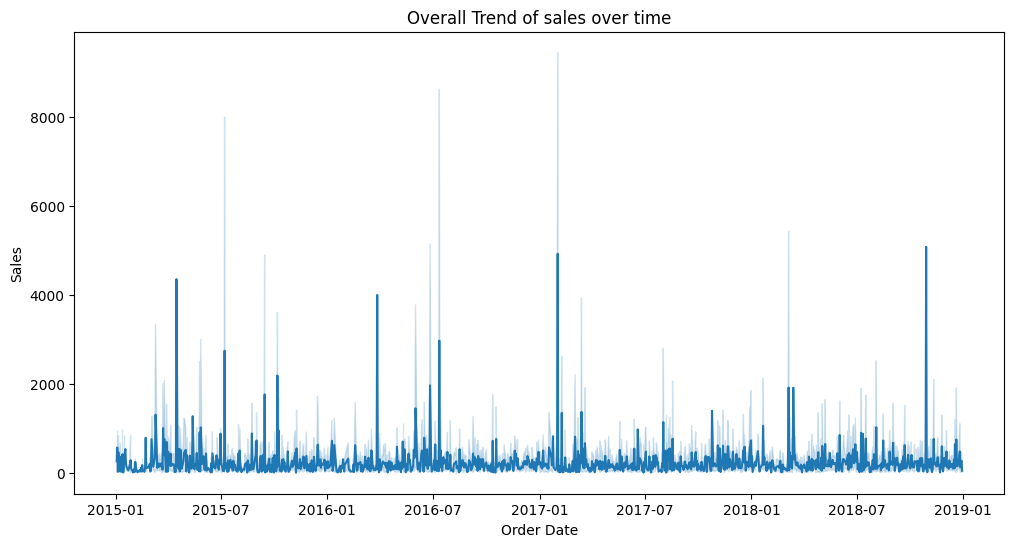

In [32]:
# Sort dates in ascending order
df["Order Date"] = df["Order Date"].sort_values(ascending=True).values
df["Ship Date"] = df["Ship Date"].sort_values(ascending=True).values

# Sort DataFrame by the earliest Order Date
df = df.sort_values(by="Order Date", ascending=True)

# Plot sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Order Date"], y=df["Sales"])
plt.title("Overall Trend of sales over time")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.show()

# Check for Yearly Seasonality

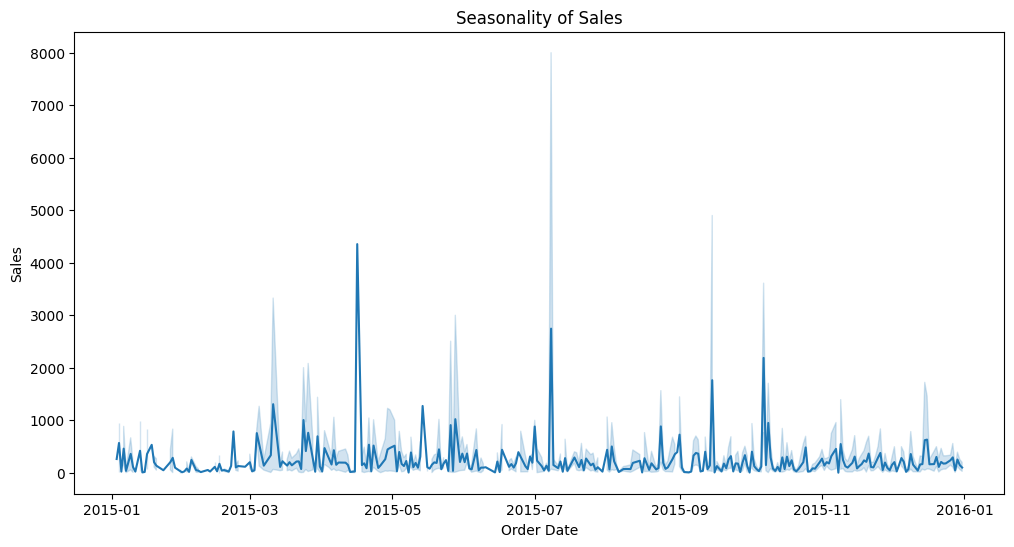

In [33]:
# Specify Seasonality period
season = df[df["Order Date"].dt.year == 2015]

# Check for yearly seasonality
plt.figure(figsize=(12, 6))
sns.lineplot(x=season["Order Date"], y=df["Sales"])
plt.title("Seasonality of Sales")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.show()

# Check for monthly seasonality

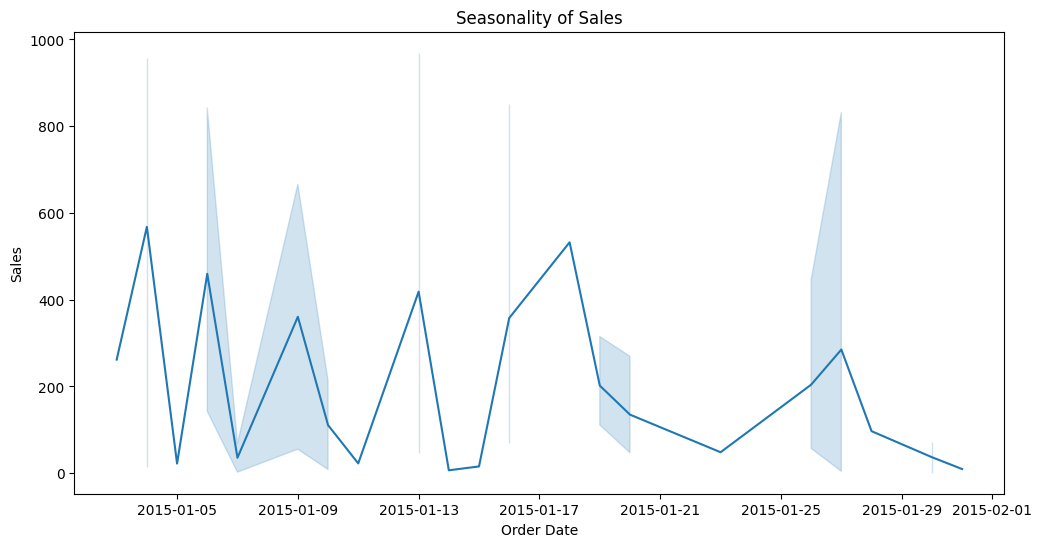

In [34]:
# Specify Seasonality year
season_year = df[df["Order Date"].dt.year == 2015]
# Specify month
season_month = season_year[season_year["Order Date"].dt.month == 1]

# Check for monthly seasonality
plt.figure(figsize=(12, 6))
sns.lineplot(x=season_month["Order Date"], y=df["Sales"])
plt.title("Seasonality of Sales")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.show()

# Check for weekly seasonality

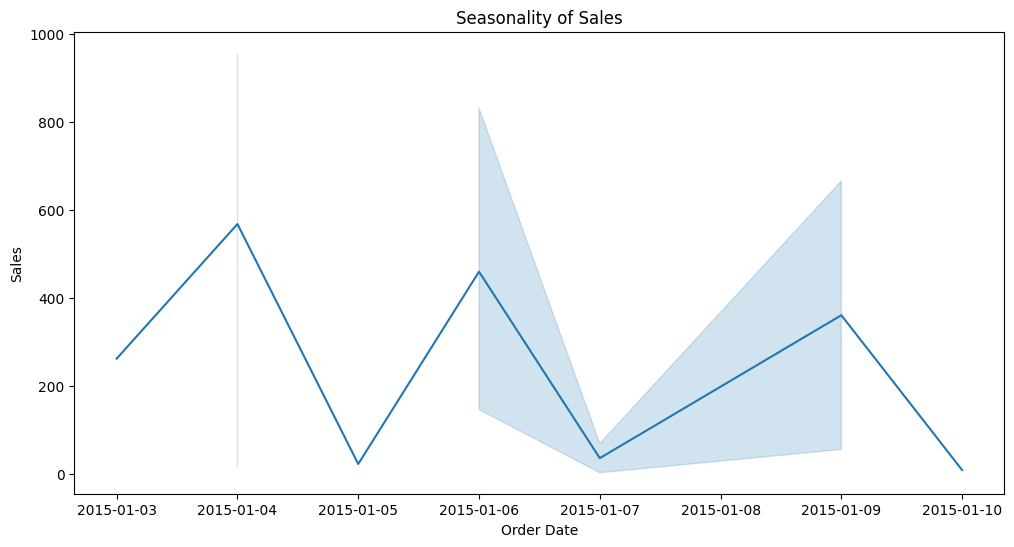

In [35]:
# Specify Seasonality year
season_year_2 = df[df["Order Date"].dt.year == 2015]
# Specify Seasonality month
season_month_2 = season_year_2[season_year_2["Order Date"].dt.month == 1]
# Specify Seasonality week
week = season_month_2[:19] # First week of the Dataset

# Check for weekly seasonality
plt.figure(figsize=(12, 6))
sns.lineplot(x=week["Order Date"], y=df["Sales"])
plt.title("Seasonality of Sales")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.show()

# Compare orders in holiday season vs. rest of the year

In [26]:
# Filter holdiay season (December)
holdiday_year_2015 = df[df["Order Date"].dt.year == 2015]
holidays_2015 = holdiday_year_2015[(holdiday_year_2015["Order Date"].dt.month == 12)]

non_holiday_2015 = holdiday_year_2015[holdiday_year_2015["Order Date"].dt.month != 12]
non_holiday_orders = non_holiday_2015["Order Date"].count()

# Sales for holiday month
print(f"Orders for December: {holidays_2015["Order Date"].count()}")

# Average orders per month on non holiday months
print(f"Average order per month: {round(non_holiday_orders/11, 2)}")

Orders for December: 274
Average order per month: 152.64


In [27]:
# Filter holdiay season (December)
holdiday_year_2017 = df[df["Order Date"].dt.year == 2017]
holidays_2017 = holdiday_year_2017[(holdiday_year_2017["Order Date"].dt.month == 12)]

non_holiday_2017 = holdiday_year_2017[holdiday_year_2017["Order Date"].dt.month != 12]
non_holiday_orders_2017 = non_holiday_2017["Order Date"].count()

# Sales for holiday month
print(f"Orders for December: {holidays_2017["Order Date"].count()}")

# Average orders per month on non holiday months
print(f"Average order per month: {round(non_holiday_orders_2017/11, 2)}")

Orders for December: 338
Average order per month: 199.64


In [31]:
# Filter holdiay season (December)
holdiday_year_2018 = df[df["Order Date"].dt.year == 2018]
holidays_2018 = holdiday_year_2018[(holdiday_year_2018["Order Date"].dt.month == 12)]

non_holiday_2018 = holdiday_year_2018[holdiday_year_2018["Order Date"].dt.month != 12]
non_holiday_orders_2018 = non_holiday_2018["Order Date"].count()

# Sales for holiday month
print(f"Orders for December: {holidays_2018["Order Date"].count()}")

# Average orders per month on non holiday months
print(f"Average order per month: {round(non_holiday_orders_2018/11, 2)}")

Orders for December: 459
Average order per month: 254.45


# Split Data

In [47]:
# Define data to be used for forecasting
df_model = df[df["Order Date"].dt.year >= 2018]
df_model = df_model[df_model["Order Date"].dt.month >= 12]

# Define train and test data
train_split = int(0.8 * len(df_model))
train_data = df_model[:train_split]
test_data = df_model[train_split:]


# Check the shapes of the train and test data
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (367, 13)
Test data shape: (92, 13)


# Naive Model

C:\Users\LESEGO\AppData\Local\Temp\ipykernel_788\2328896983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Naive Forecast"] = naive_forecast


[]

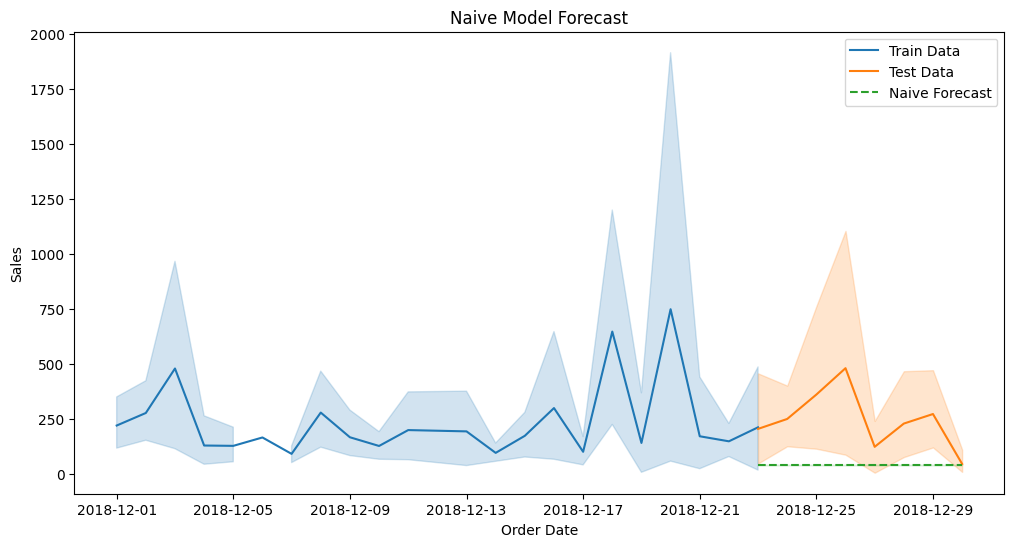

In [49]:
# Create Naive forecast
naive_forecast = train_data["Sales"].iloc[-1]
test_data["Naive Forecast"] = naive_forecast

# Visualize forecast
plt.figure(figsize=(12, 6))
sns.lineplot(x=train_data["Order Date"], y=train_data["Sales"], label="Train Data")
sns.lineplot(x=test_data["Order Date"], y=test_data["Sales"], label="Test Data")
sns.lineplot(x=test_data["Order Date"], y=test_data["Naive Forecast"], label="Naive Forecast", linestyle="--")
plt.title("Naive Model Forecast")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.legend()
plt.plot()

# Auto Regression Model

C:\Users\LESEGO\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LESEGO\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\LESEGO\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\LESEGO\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support ext

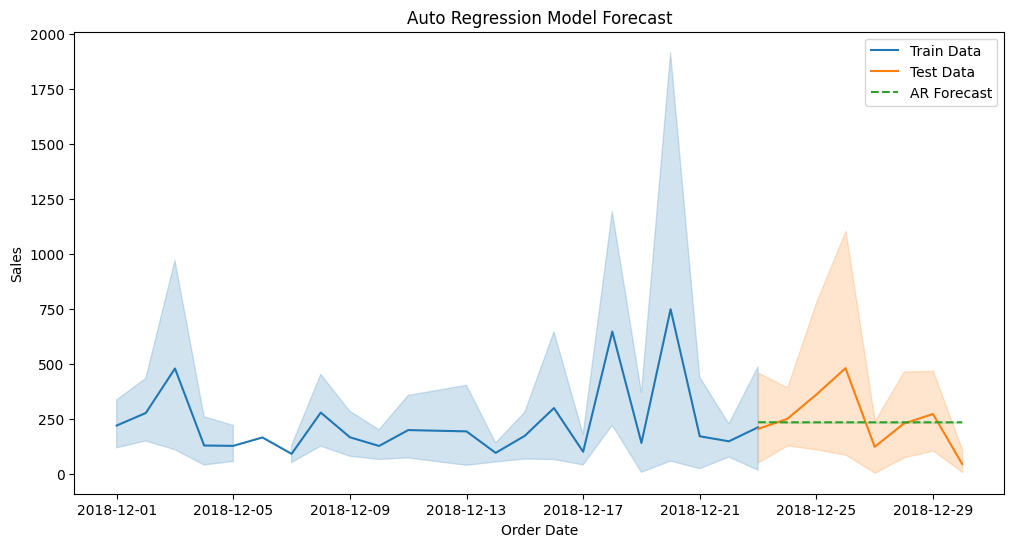

In [58]:
# Create AR Model
ar_model = AutoReg(train_data["Sales"], lags=1)
ar_model_fitted = ar_model.fit()

# Forecast values
ar_forecast = ar_model_fitted.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)

# Add forecast to test data
test_data["AR Forecast"] = ar_forecast.values

# Visualise AR Model Results
plt.figure(figsize=(12, 6))
sns.lineplot(x=train_data["Order Date"], y=train_data["Sales"], label="Train Data")
sns.lineplot(x=test_data["Order Date"], y=test_data["Sales"], label="Test Data")
sns.lineplot(x=test_data["Order Date"], y=test_data["AR Forecast"], label="AR Forecast", linestyle="--")
plt.title("Auto Regression Model Forecast")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# ARIMA Model

<Figure size 1200x600 with 0 Axes>

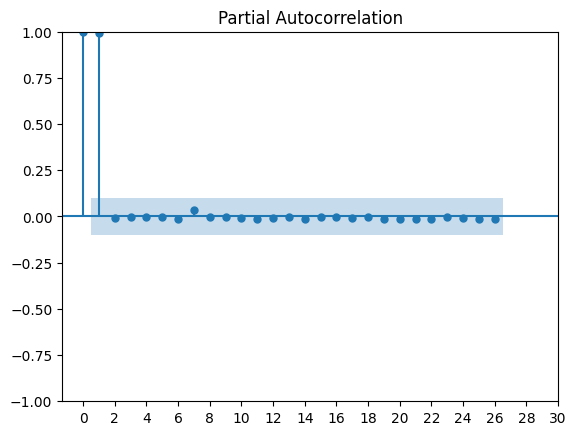

In [65]:
# Determine p variable with Partial Autocorrelation Plot
plt.figure(figsize=(12, 6))
plot_pacf(train_data["Order Date"])
plt.xticks(np.arange(0, 31, 2))
plt.show() # p = 2

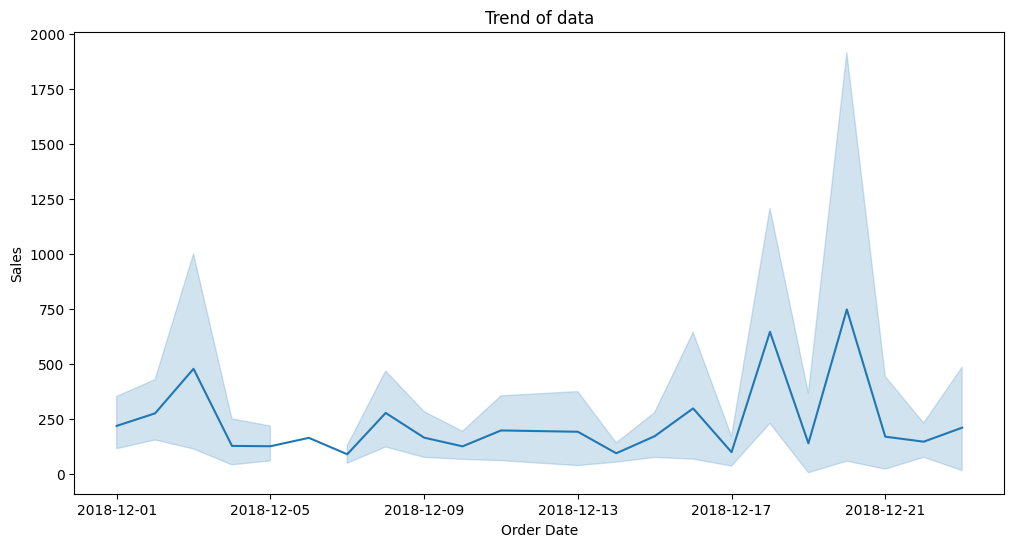

In [66]:
# Determin d variable with identifying the trend of the data
plt.figure(figsize=(12, 6))
sns.lineplot(x=train_data["Order Date"], y=train_data["Sales"])
plt.title("Trend of data")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.show() # d = 1

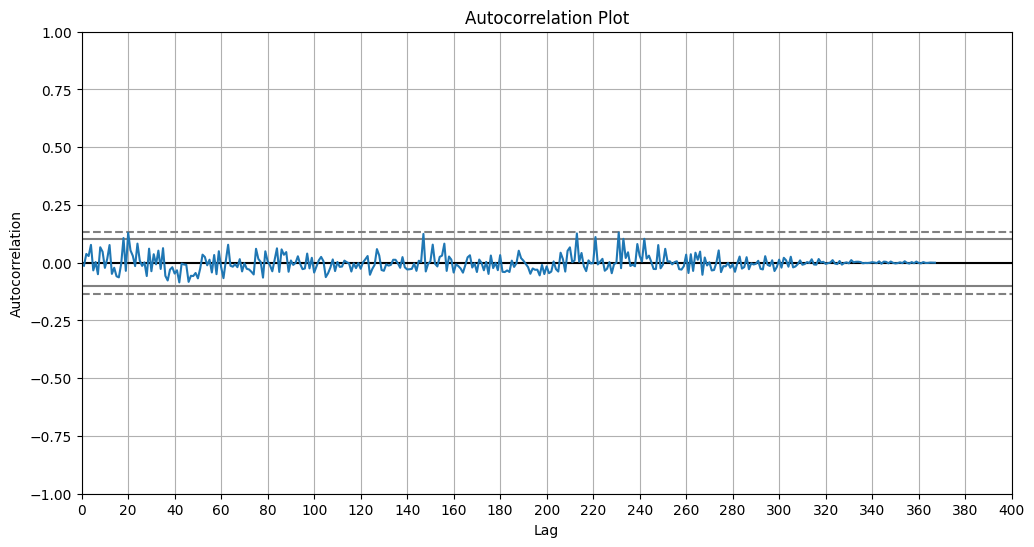

In [71]:
# Determine the q variable with autocorrelation plot
plt.figure(figsize=(12, 6))
autocorrelation_plot(train_data["Sales"])
plt.title("Autocorrelation Plot")
plt.xticks(np.arange(0, 401, 20))
plt.show() # q = 20

C:\Users\LESEGO\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LESEGO\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LESEGO\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\LESEGO\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_pre

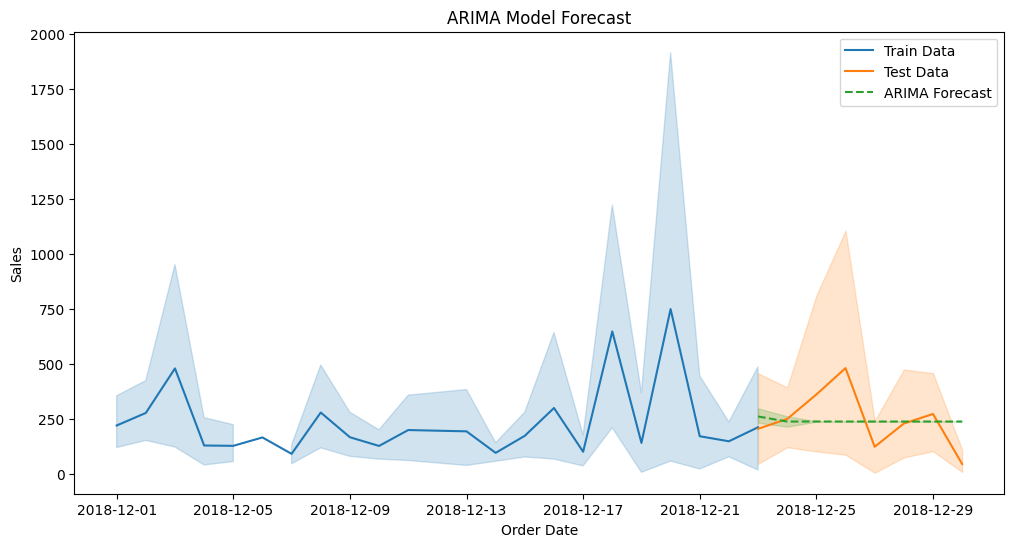

In [72]:
# Create ARIMA Model
arima_model = ARIMA(train_data["Sales"], order=(2, 1, 20))
arima_model_fitted = arima_model.fit()

# Forecast Values
arima_forecast = arima_model_fitted.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)

# Add forecast to test data
test_data["ARIMA Forecast"] = arima_forecast.values

# Visualize ARIMA Model results
plt.figure(figsize=(12, 6))
sns.lineplot(x=train_data["Order Date"], y=train_data["Sales"], label="Train Data")
sns.lineplot(x=test_data["Order Date"], y=test_data["Sales"], label="Test Data")
sns.lineplot(x=test_data["Order Date"], y=test_data["ARIMA Forecast"], label="ARIMA Forecast", linestyle="--")
plt.title("ARIMA Model Forecast")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.show()

# Compare Models

In [76]:
# Find Mean Absolute Error of all models
naive_mae = mean_absolute_error(test_data["Sales"], test_data["Naive Forecast"])
ar_mae = mean_absolute_error(test_data["Sales"], test_data["AR Forecast"])
arima_mae = mean_absolute_error(test_data["Sales"], test_data["ARIMA Forecast"])

# Print Mean Absolute Error of all models
print(f"Mean Absolute Error for Naive Model: {round(naive_mae, 2)}")
print(f"Mean Absolute Error for Auto Regression Model: {round(ar_mae, 2)}")
print(f"Mean Absolute Error for ARIMA Model: {round(arima_mae, 2)}")

Mean Absolute Error for Naive Model: 242.25
Mean Absolute Error for Auto Regression Model: 271.14
Mean Absolute Error for ARIMA Model: 275.67
